In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('MNIST.csv')

In [4]:
df.head(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   
5       0  ...         0         0         0         0         0         0   
6       0  ...         0         0         0         0         0         0   
7       0  ...         0         0         0         0         0         0   
8       0  ...         0         0         0         0         0         0   
9       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         0         0         0         0  
6         0         0         0         0  
7         0         0         0         0  
8         0         0         0         0  
9         0         0         0         0  

[10 rows x 785 columns]

In [5]:
df.shape

(42000, 785)

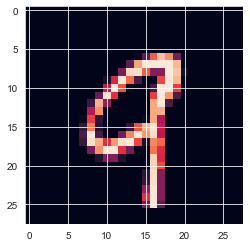

In [6]:
plt.imshow(df.iloc[41999,1:].values.reshape(28,28))

# first before applying PCA

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df.drop(columns=['label'])
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
X_train

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
34941       0       0       0       0       0       0       0       0       0   
24433       0       0       0       0       0       0       0       0       0   
24432       0       0       0       0       0       0       0       0       0   
8832        0       0       0       0       0       0       0       0       0   
30291       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
6265        0       0       0       0       0       0       0       0       0   
11284       0       0       0       0       0       0       0       0       0   
38158       0       0       0       0       0       0       0       0       0   
860         0       0       0       0       0       0       0       0       0   
15795       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
34941       0  ...         0         0         0         0         0   
24433       0  ...         0         0         0         0         0   
24432       0  ...         0         0         0         0         0   
8832        0  ...         0         0         0         0         0   
30291       0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
6265        0  ...         0         0         0         0         0   
11284       0  ...         0         0         0         0         0   
38158       0  ...         0         0         0         0         0   
860         0  ...         0         0         0         0         0   
15795       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
34941         0         0         0         0         0  
24433         0         0         0         0         0  
24432         0         0         0         0         0  
8832          0         0         0         0         0  
30291         0         0         0         0         0  
...         ...       ...       ...       ...       ...  
6265          0         0         0         0         0  
11284         0         0         0         0         0  
38158         0         0         0         0         0  
860           0         0         0         0         0  
15795         0         0         0         0         0  

[33600 rows x 784 columns]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier()

In [12]:
model=knn.fit(X_train,y_train)

In [13]:
import time
start=time.time()
y_pred=model.predict(X_test)
print(time.time()-start)

23.774479389190674


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test,y_pred)*100

96.48809523809524

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
np.mean(cross_val_score(knn,X_train,y_train))*100

96.42261904761904

# After applying PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=267)

In [20]:
x_train_trf=pca.fit_transform(X_train)
x_test_trf=pca.transform(X_test)

In [21]:
x_train_trf.shape

(33600, 267)

In [22]:
model=knn.fit(x_train_trf,y_train)
import time
start=time.time()
y_pred_trf=model.predict(x_test_trf)
print(time.time()-start)

16.318156480789185


In [23]:
accuracy_score(y_test,y_pred_trf)*100

96.63095238095238

In [24]:
np.mean(cross_val_score(knn,x_train_trf,y_train))*100

96.50595238095237

In [ ]:
for i in range(1,784):
    pca=PCA(n_components=i)
    x_train_trf=pca.fit_transform(X_train)
    x_test_trf=pca.transform(X_test)
    model=knn.fit(x_train_trf,y_train)
    y_pred_trf=model.predict(x_test_trf)
    print(i,accuracy_score(y_test,y_pred_trf)*100)

1 27.440476190476193
2 42.214285714285715
3 48.47619047619048
4 61.94047619047619
5 72.98809523809524
6 81.89285714285714
7 86.69047619047619
8 89.32142857142857
9 90.76190476190476
10 92.47619047619048
11 93.19047619047619
12 94.23809523809524
13 94.94047619047619
14 95.39285714285714
15 95.44047619047619
16 95.83333333333334
17 96.20238095238095
18 96.26190476190476
19 96.44047619047619
20 96.60714285714286
21 96.65476190476191


# Visualization part

# 2D visualisation first

In [27]:
pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(X_train)
x_test_trf=pca.transform(X_test)

In [28]:
import plotly.express as px

In [30]:
y_train_trf=y_train.astype(str)
fig=px.scatter(x=x_train_trf[:,0],y=x_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

# Now for 3D

In [31]:
pca=PCA(n_components=3)
x_train_trf=pca.fit_transform(X_train)
x_test_trf=pca.transform(X_test)

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2], color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

# checking variance

In [39]:
pca.explained_variance_

array([335506.5762039 , 244807.10495475, 212051.03329422])

In [42]:
#in percentage
pca.explained_variance_ratio_*100

array([9.77072202, 7.12934511, 6.17541308])

# checking eigen vector

In [40]:
pca.components_

array([[ 4.33361250e-17,  8.88618731e-19,  1.07839721e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.99702399e-17,  1.60926754e-17,  1.13729443e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.02774200e-17, -4.66477059e-17, -2.78442018e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])